In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
import statsmodels.api as sm
import seaborn as sns
import plotly.express as px
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix

In [118]:
dta=sm.datasets.fair.load_pandas().data

In [119]:
dta.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb   affairs  
0              5.0  0.111111  
1              4.0  3.230769  
2              5.0  1.400000  
3              5.0  0.727273  
4              4.0  4.666666

In [120]:
print(dta.shape)
dta.describe()

(6366, 9)


rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs  
count  6366.000000  6366.000000      6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.705374  
std       2.178003     0.942399         1.346435     2.203374  
min       9.000000     1.000000         1.000000     0.000000  
25%      12.000000     3.000000         3.000000     0.000000  
50%      14.000000     3.000000         4.000000     0.000000  
75%      16.000000     4.000000         5.000000     0.484848  
max      20.000000     6.000000         6.000000    57.599991

In [121]:
dta['affair'] = (dta.affairs > 0).astype(int)
dta.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb   affairs  affair  
0              5.0  0.111111       1  
1              4.0  3.230769       1  
2              5.0  1.400000       1  
3              5.0  0.727273       1  
4              4.0  4.666666       1

In [122]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int32  
dtypes: float64(9), int32(1)
memory usage: 472.6 KB


<AxesSubplot:>

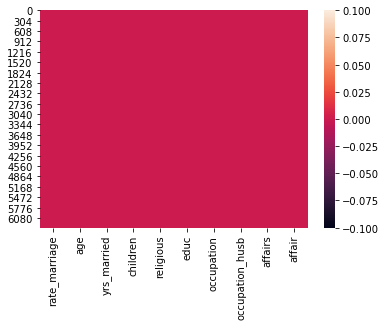

In [123]:
sns.heatmap(dta.isnull())

In [124]:
dta['affair']=dta['affair'].astype('float64')
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   float64
dtypes: float64(10)
memory usage: 497.5 KB


In [125]:
px.scatter(dta, x=dta.select_dtypes(np.float64).columns, y='affair', trendline='ols',
          facet_col="variable",size_max=45, facet_col_wrap=3).update_xaxes(matches=None)

In [126]:

dta['affair']=dta['affair'].astype('int64')

In [127]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
 9   affair           6366 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 497.5 KB


In [128]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
        religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y = np.ravel(y)

In [129]:
X.head()

Intercept  occ_2  occ_3  occ_4  occ_5  occ_6  occ_husb_2  occ_husb_3  \
0        1.0    1.0    0.0    0.0    0.0    0.0         0.0         0.0   
1        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
2        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   
3        1.0    0.0    0.0    0.0    1.0    0.0         0.0         0.0   
4        1.0    0.0    1.0    0.0    0.0    0.0         0.0         0.0   

   occ_husb_4  occ_husb_5  occ_husb_6  rate_marriage   age  yrs_married  \
0         0.0         1.0         0.0            3.0  32.0          9.0   
1         1.0         0.0         0.0            3.0  27.0         13.0   
2         0.0         1.0         0.0            4.0  22.0          2.5   
3         0.0         1.0         0.0            4.0  37.0         16.5   
4         1.0         0.0         0.0            5.0  27.0          9.0   

   children  religious  educ  
0       3.0        3.0  17.0  
1       3.0        1.0  14.0  
2       0.0        1.0  16.0  
3       4.0        3.0  16.0  
4       1.0        1.0  14.0

In [130]:
X.describe()

Intercept        occ_2        occ_3        occ_4        occ_5  \
count     6366.0  6366.000000  6366.000000  6366.000000  6366.000000   
mean         1.0     0.134936     0.437166     0.288093     0.116243   
std          0.0     0.341682     0.496075     0.452910     0.320541   
min          1.0     0.000000     0.000000     0.000000     0.000000   
25%          1.0     0.000000     0.000000     0.000000     0.000000   
50%          1.0     0.000000     0.000000     0.000000     0.000000   
75%          1.0     0.000000     1.000000     1.000000     0.000000   
max          1.0     1.000000     1.000000     1.000000     1.000000   

             occ_6   occ_husb_2   occ_husb_3   occ_husb_4   occ_husb_5  \
count  6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean      0.017122     0.205467     0.076971     0.318882     0.279453   
std       0.129737     0.404074     0.266567     0.466080     0.448766   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        occ_husb_6  rate_marriage          age  yrs_married     children  \
count  6366.000000    6366.000000  6366.000000  6366.000000  6366.000000   
mean      0.083255       4.109645    29.082862     9.009425     1.396874   
std       0.276289       0.961430     6.847882     7.280120     1.433471   
min       0.000000       1.000000    17.500000     0.500000     0.000000   
25%       0.000000       4.000000    22.000000     2.500000     0.000000   
50%       0.000000       4.000000    27.000000     6.000000     1.000000   
75%       0.000000       5.000000    32.000000    16.500000     2.000000   
max       1.000000       5.000000    42.000000    23.000000     5.500000   

         religious         educ  
count  6366.000000  6366.000000  
mean      2.426170    14.209865  
std       0.878369     2.178003  
min       1.000000     9.000000  
25%       2.000000    12.000000  
50%       2.000000    14.000000  
75%       3.000000    16.000000  
max       4.000000    20.000000

In [131]:

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [132]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [133]:
X_train

array([[ 0.        , -0.39700626, -0.87569366, ..., -0.96684641,
         0.67561485, -1.01268632],
       [ 0.        , -0.39700626, -0.87569366, ...,  0.42061125,
         0.67561485, -1.01268632],
       [ 0.        , -0.39700626,  1.14195186, ..., -0.96684641,
        -1.62166813, -1.01268632],
       ...,
       [ 0.        , -0.39700626,  1.14195186, ..., -0.96684641,
        -0.47302664, -0.09435324],
       [ 0.        , -0.39700626,  1.14195186, ..., -0.96684641,
         1.82425634, -0.09435324],
       [ 0.        , -0.39700626, -0.87569366, ...,  0.42061125,
        -1.62166813,  0.82397984]])

In [134]:

X_test = scaler.transform(X_test)

In [135]:
classifier = LogisticRegression()
classifier.fit(X_train ,y_train)

LogisticRegression()

In [136]:
y_pred = classifier.predict(X_test)


In [137]:
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[951, 125],
       [347, 169]], dtype=int64)

In [138]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.73      0.88      0.80      1076
         1.0       0.57      0.33      0.42       516

    accuracy                           0.70      1592
   macro avg       0.65      0.61      0.61      1592
weighted avg       0.68      0.70      0.68      1592



In [143]:
metrics.roc_auc_score(y_test,y_pred)

0.6056741880637445

In [144]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores

C:\Users\278\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\278\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\278\anaconda3\lib\site-packages\sklea

array([0.72370487, 0.69858713, 0.73940345, 0.70800628, 0.71428571,
       0.72684458, 0.72798742, 0.70754717, 0.75      , 0.75314465])

In [145]:
scores.mean()

0.7249511270400758